In [1]:
!pip install beautifulsoup4
!pip install requests

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [3]:
Product_name = []
Offer_Prices = []
Original_Prices = []
Description =[]
Reviews = []

In [4]:
for i in range(2, 10):
    url = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_6_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_6_0_na_na_na&as-pos=6&as-type=TRENDING&suggestionId=mobiles&requestId=acf3ca05-4f9e-4dca-8034-924059566256&page="+str(i)
    r = requests.get(url)
    
    if r.status_code == 200:
        soup = BeautifulSoup(r.text, "html.parser")
        box = soup.find("div", class_="DOjaWF gdgoEp")
        
        if box:
            names = box.find_all("div", class_="KzDlHZ")
            for j in names:
                name = j.text
                Product_name.append(name)
            
            Offer_prices = box.find_all("div", class_="Nx9bqj _4b5DiR")
            for k in Offer_prices:
                name = k.text
                Offer_Prices.append(name)

            Original_prices = box.find_all("div", class_="yRaY8j ZYYwLA")
            for h in Original_prices:
                name = h.text
                Original_Prices.append(name)

            desc = box.find_all("ul", class_="G4BRas")
            for l in desc:
                name = l.text
                Description.append(name)

            reviews = box.find_all("div", class_="XQDdHH")
            for m in reviews:
                name = m.text
                Reviews.append(name)
        else:
            print(f"No box found on page {i}.")
    else:
        print(f"Failed to retrieve page {i}. Status code: {r.status_code}")

Failed to retrieve page 2. Status code: 403
Failed to retrieve page 3. Status code: 403
Failed to retrieve page 4. Status code: 403
Failed to retrieve page 5. Status code: 403
Failed to retrieve page 6. Status code: 403
Failed to retrieve page 7. Status code: 403
Failed to retrieve page 8. Status code: 403
Failed to retrieve page 9. Status code: 403


In [5]:
min_length = min(len(Product_name), len(Offer_Prices), len(Original_Prices),  len(Description), len(Reviews))

Product_name = Product_name[:min_length]
Offer_Prices = Offer_Prices[:min_length]
Original_Prices = Original_Prices[:min_length]
Description = Description[:min_length]
Reviews = Reviews[:min_length]

In [6]:
data = {
    "product name":Product_name,
    "offer_prices":Offer_Prices,
    "original_prices":Original_Prices,
    "description":Description,
    "reviews":Reviews
}

In [7]:
df = pd.DataFrame(data)

In [8]:
df.to_csv("mobile.csv")

In [9]:
df = pd.read_csv("mobile.csv")
df.head()

,Unnamed: 0,product name,offer_prices,original_prices,description,reviews


In [10]:
df["offer_prices"] = df["offer_prices"].str.replace("₹","")
df["offer_prices"] = df["offer_prices"].str.replace(",","")
df["offer_prices"] = df["offer_prices"].astype(int)

In [11]:
df["original_prices"] = df["original_prices"].str.replace("₹","")
df["original_prices"] = df["original_prices"].str.replace(",","")
df["original_prices"] = df["original_prices"].astype(int)

In [12]:
df["reviews"] = df["reviews"].astype(float)

In [13]:
df['Company'] = df['product name'].str.split().str[0]

print(df[['product name', 'Company']].head(3))

Empty DataFrame
Columns: [product name, Company]
Index: []


In [14]:
df['storage(in GB)'] = df['product name'].str.extract(r'(\d+\s*GB)')

df['storage(in GB)'] = df['storage(in GB)'].str.replace(" ", "")
df['storage(in GB)'] = df['storage(in GB)'].str.replace("GB", "")

print(df[['product name', 'storage(in GB)']].head(3))

Empty DataFrame
Columns: [product name, storage(in GB)]
Index: []


In [15]:
df['Ram(in GB)'] = df['description'].str.extract(r'(\d+\s*GB)')

df['Ram(in GB)'] = df['Ram(in GB)'].str.replace(" ", "")
df['Ram(in GB)'] = df['Ram(in GB)'].str.replace("GB", "")

print(df[['description', 'Ram(in GB)']].head(3))

Empty DataFrame
Columns: [description, Ram(in GB)]
Index: []


In [16]:
df['display size(in inch)'] = df['description'].str.extract(r'(\d+\s*inch)')

df['display size(in inch)'] = df['display size(in inch)'].str.replace(" ", "")
df['display size(in inch)'] = df['display size(in inch)'].str.replace("inch", "")

print(df[['description', 'display size(in inch)']].head(3))

Empty DataFrame
Columns: [description, display size(in inch)]
Index: []


In [17]:
df['Battery(in mAh)'] = df['description'].str.extract(r'(\d+\s*mAh)')

df['Battery(in mAh)'] = df['Battery(in mAh)'].str.replace(" ", "")
df['Battery(in mAh)'] = df['Battery(in mAh)'].str.replace("mAh", "")

print(df[['description', 'Battery(in mAh)']].head(3))

Empty DataFrame
Columns: [description, Battery(in mAh)]
Index: []


In [18]:
df['Rear camera(in mp)'] = df['description'].str.extract(r'(\d+\s*MP)')

df['Rear camera(in mp)'] = df['Rear camera(in mp)'].str.replace(" ", "")
df['Rear camera(in mp)'] = df['Rear camera(in mp)'].str.replace("MP", "")

print(df[['description', 'Rear camera(in mp)']].head(3))

Empty DataFrame
Columns: [description, Rear camera(in mp)]
Index: []


In [19]:
df['Front camera(in mp)'] = df['description'].str.extract(r'(\d+\s*MP Front)')

df['Front camera(in mp)'] = df['Front camera(in mp)'].str.replace(" ", "")
df['Front camera(in mp)'] = df['Front camera(in mp)'].str.replace("MPFront", "")

print(df[['description', 'Front camera(in mp)']].head(3))

Empty DataFrame
Columns: [description, Front camera(in mp)]
Index: []


In [20]:
df.head()

,Unnamed: 0,product name,offer_prices,original_prices,description,reviews,Company,storage(in GB),Ram(in GB),display size(in inch),Battery(in mAh),Rear camera(in mp),Front camera(in mp)


In [21]:
df = df.drop(columns = ["Unnamed: 0", "product name", "description"])

In [22]:
df.head()

,offer_prices,original_prices,reviews,Company,storage(in GB),Ram(in GB),display size(in inch),Battery(in mAh),Rear camera(in mp),Front camera(in mp)


In [23]:
df = df.iloc[:, [3, 0, 1, 2, 4, 5, 6, 7, 8, 9]]
df.head()

,Company,offer_prices,original_prices,reviews,storage(in GB),Ram(in GB),display size(in inch),Battery(in mAh),Rear camera(in mp),Front camera(in mp)


In [24]:
df.shape

(0, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                0 non-null      object 
 1   offer_prices           0 non-null      int32  
 2   original_prices        0 non-null      int32  
 3   reviews                0 non-null      float64
 4   storage(in GB)         0 non-null      object 
 5   Ram(in GB)             0 non-null      object 
 6   display size(in inch)  0 non-null      object 
 7   Battery(in mAh)        0 non-null      object 
 8   Rear camera(in mp)     0 non-null      object 
 9   Front camera(in mp)    0 non-null      object 
dtypes: float64(1), int32(2), object(7)
memory usage: 132.0+ bytes


In [26]:
df.describe()

,offer_prices,original_prices,reviews
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [27]:
df.head(3)

,Company,offer_prices,original_prices,reviews,storage(in GB),Ram(in GB),display size(in inch),Battery(in mAh),Rear camera(in mp),Front camera(in mp)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

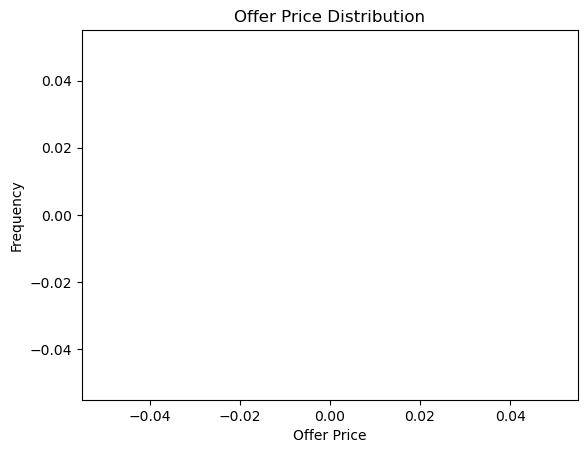

In [29]:
sns.histplot(df['offer_prices'], kde=True)
plt.title('Offer Price Distribution')
plt.xlabel('Offer Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=[20,6])
df_sorted = df.sort_values('original_prices', ascending=False)
df_sorted.plot(kind='bar', x='Company', y=['original_prices', 'offer_prices'], figsize=(10, 6))
plt.title('Original vs Offer Prices by Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.barplot(x='Company', y='reviews', data=df)
plt.title('Average Reviews by Company')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.histplot(df['Battery(in mAh)'], bins=10, kde=True)
plt.title('Battery Capacity Distribution')
plt.xlabel('Battery (mAh)')
plt.show()

In [ ]:
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.countplot(x='Company', data=df)
plt.title('Count of Phones by Brand')
plt.xticks(rotation=45)
plt.show()

In [ ]:
storage_counts = df['storage(in GB)'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(storage_counts, labels=storage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Storage Capacity Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['offer_prices'], bins=5, kde=True, color='skyblue')
plt.title("Offer Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='storage(in GB)', y='offer_prices')
plt.title("Offer Price by Storage")
plt.xlabel("Storage (GB)")
plt.ylabel("Price (₹)")
plt.tight_layout()
plt.show()


In [ ]:
# Check correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df[['offer_prices', 'original_prices', 'reviews', 'storage(in GB)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='offer_prices', y='reviews', hue='storage(in GB)', palette='viridis', s=100)
plt.title("Offer Price vs Reviews")
plt.xlabel("Offer Price (₹)")
plt.ylabel("Reviews")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['reviews'], bins=5, kde=True, color='orange')
plt.title("Reviews Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="mean")
df["storage(in GB)"] = si.fit_transform(df[["storage(in GB)"]])
df["Ram(in GB)"] = si.fit_transform(df[["Ram(in GB)"]])
df["Battery(in mAh)"] = si.fit_transform(df[["Battery(in mAh)"]])
df["Rear camera(in mp)"] = si.fit_transform(df[["Rear camera(in mp)"]])
df["Front camera(in mp)"] = si.fit_transform(df[["Front camera(in mp)"]])

In [ ]:
df.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
object_list = []
for i in df.select_dtypes(include = ["object"]).columns:
    object_list.append(i)
for i in object_list:
    df[i] = le.fit_transform(df[i])
df.head(3)

In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = "offer_prices")
y = df["offer_prices"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [ ]:
lg.fit(x_train, y_train)

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)

print(r2_score)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

random_search = RandomizedSearchCV(lg, param_space, n_iter=100, cv=5)
random_search.fit(x_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")